Project - Comcast Telecom Consumer Complaints

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
from time import strptime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as s

In [2]:
df = pd.read_csv('E:\\Simplilearn\\Data Science with Python\\Projects\\Comcast\\Comcast_telecom_complaints_data.csv')
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
# date column is still a string, we need to parse it to a datetime format and setting a date index

df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [5]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

df = df.set_index(df["date_index"])

#-Provide the trend chart for the number of complaints at monthly and daily granularity levels.

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64


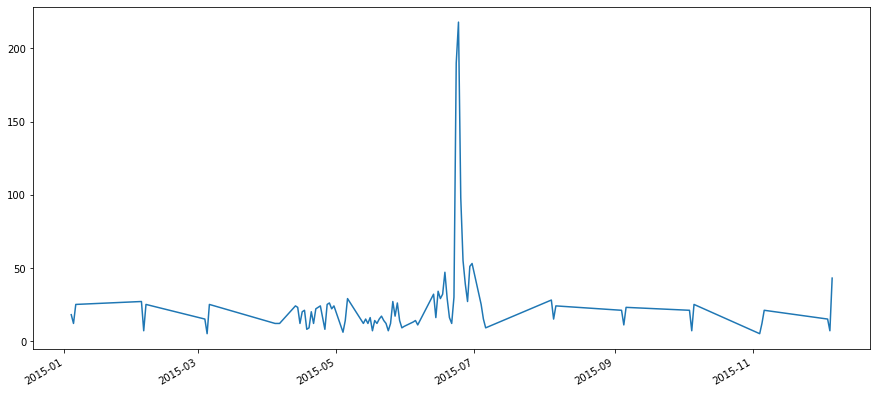

In [6]:
# Daily trend

plt.figure(figsize=(15,7))
print(df["Date_month_year"].value_counts()[:3])
df["Date_month_year"].value_counts().plot();

Jun 23rd and 24th received the highest number of complaints

date_index
2015-01-31    55
2015-02-28    59
2015-03-31    45
Freq: M, dtype: int64


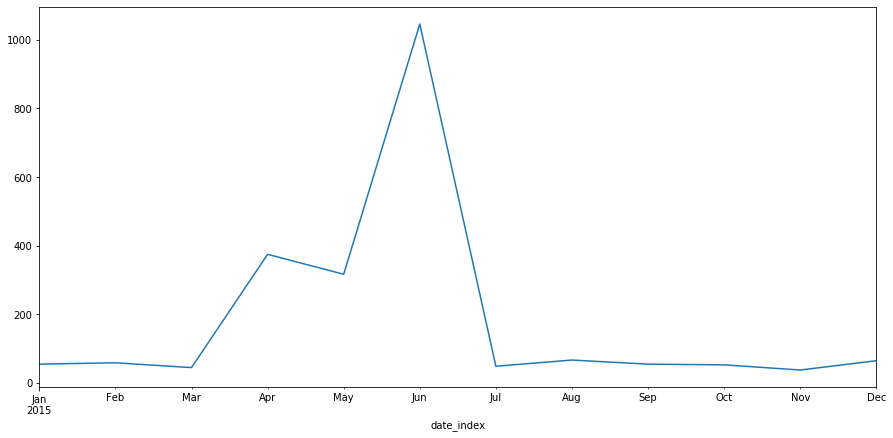

In [7]:
# Monthly trend

plt.figure(figsize=(15,7))
print(df.groupby(pd.Grouper(freq="M")).size()[:3])
df.groupby(pd.Grouper(freq="M")).size().plot()

 The month of June received the maximum number of complaints

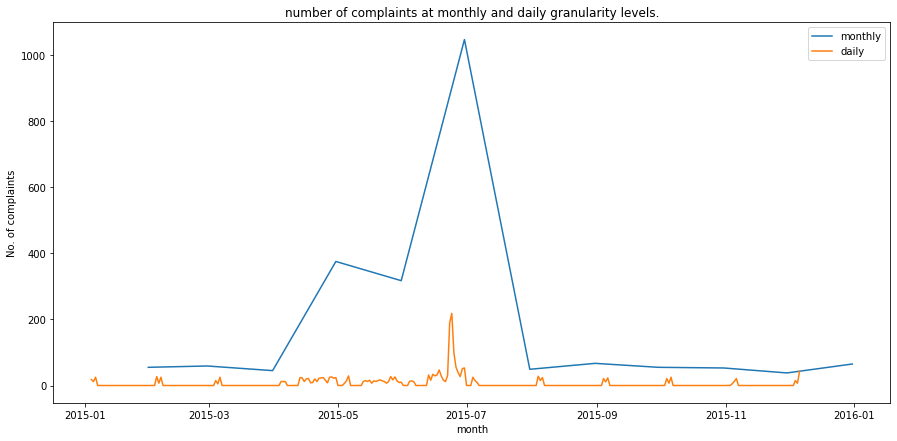

In [8]:
#Showing both Month and Daily trends in the same figure

month_vs_complaint = df['Customer Complaint'].resample('M').count()
date_vs_complaint = df['Customer Complaint'].resample('D').count()
plt.figure(figsize=(15,7))
plt.plot(month_vs_complaint, label = 'monthly')
plt.plot(date_vs_complaint, label = 'daily')
plt.title('number of complaints at monthly and daily granularity levels.')
plt.ylabel('No. of complaints')
plt.xlabel('month')
plt.legend()

Provide a table with the frequency of complaint types.

In [9]:
complaints_type=df['Customer Complaint'].value_counts()
complaints_type=pd.DataFrame({'Customer Complaint Type':complaints_type.index,'Freq':complaints_type.values})
print(complaints_type)

                                Customer Complaint Type  Freq
0                                               Comcast    83
1                                      Comcast Internet    18
2                                      Comcast Data Cap    17
3                                               comcast    13
4                                             Data Caps    11
...                                                 ...   ...
1836                          Comcast pricing practices     1
1837                                  monthly data caps     1
1838  Comcast Support Unable to Provide Accurate Inf...     1
1839                           Comcast/Xfinity Internet     1
1840                       lack of service from comcast     1

[1841 rows x 2 columns]


Since complaints could be common but how they are put forward is different. We shall use the wordcloud to understand the frequency of complaints.

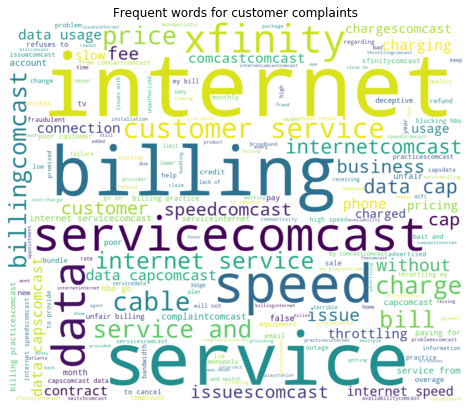

In [10]:
# Unigram wordcloud for reviews
# note: this is a rough way to estimate most common complaints 

from wordcloud import WordCloud, STOPWORDS

common_complaints = list(df['Customer Complaint'].dropna())
common_complaints =''.join(common_complaints).lower()

list_stops = ('comcast','now','company','day','someone','thing','also','got','way','call','called','one','said','tell')

for word in list_stops:
    STOPWORDS.add(word)
    
    
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

By observing the above wordcloud, we can infer that most common issues appear to be with customer service, billing charges/prices , internet speed, and data limits according to the fcc complaints file.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [11]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [12]:
df["newStatus"]=["Open" if (Status=="Open" or Status=="Pending") else "Closed" for Status in df["Status"]]
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed


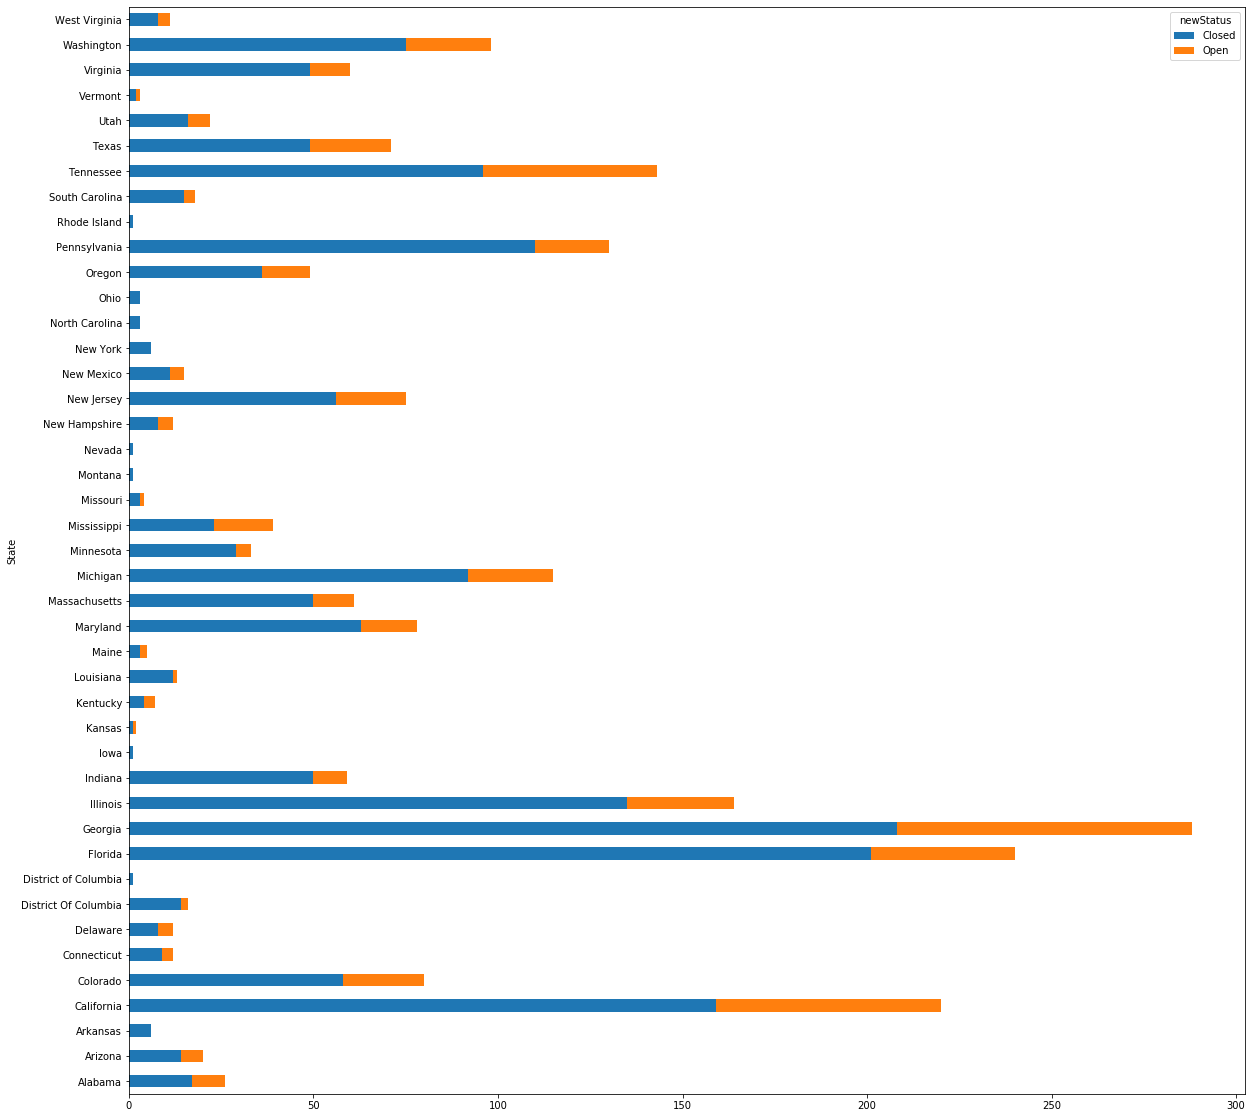

In [13]:
#Provide state wise status of complaints in a stacked bar chart.

df.groupby(['State', 'newStatus']).size().unstack().plot(kind='barh',figsize=(20,20), stacked=True)

#Provide insights on:

    Which state has the maximum complaints - Georgia has the maximum Complaints followed by Florida and California.
    Which state has the highest percentage of unresolved complaints - Kansas has the unresolved Complaints.

In [14]:
#Retrievieng th state that has the maximum complaints

cs = pd.crosstab(index=df['State'], columns=df['newStatus'])
cs['tc']=cs['Closed']+cs['Open']
print(cs['tc'].idxmax())

Georgia


In [15]:
#Retrievieng th state that has the highest percentage of unresolved complaints
cs['URP']=((cs['Open'])/cs['tc'])*100
#print(cs)
print(cs['URP'].idxmax())

Kansas


- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [16]:
#Percentage of Compliants resolved till date

np1 = df.groupby(['newStatus']).size()
np2 = df.groupby(['newStatus']).size().sum()

percentage_resolved = np1[0]/np2*100
percentage_resolved.round()

77.0

Resolution rate is 77% for the complaints received.

In [17]:
ser1 = df[df['newStatus']=="Closed"].groupby('Received Via').count()['Ticket #']
ser2 = df.groupby('Received Via').count()['Ticket #']

Ptage = ser1/ser2
Ptage


Received Via
Customer Care Call    0.772118
Internet              0.762896
Name: Ticket #, dtype: float64

Resolution rate is 77% and 76% respectively for the complaints received through Internet and customer care calls.